<b> SMOTE (Synthetic Minority Oversampling Technique)</b> is a method used to address the issue of imbalanced datasets, which occur when one class has significantly fewer samples compared to others. Such imbalances can lead to biased model predictions, as the model tends to favor the majority class.

* <b> How does it work? </b>

SMOTE generates synthetic samples for the minority class to balance the dataset. It works by:

* Identifying the Nearest Neighbors: For each minority class sample, SMOTE finds its k-nearest neighbors (k is a user-defined parameter).

* Creating Synthetic Samples: It randomly selects one of the nearest neighbors and generates a synthetic sample between the original data point and the neighbor. The synthetic sample is created along the line segment connecting the two points in the feature space.

* Repeating the Process: This process is repeated until the desired level of balance is achieved between the minority and majority classes.

* SMOTE focuses on interpolating between existing data points rather than duplicating data, making it a more robust approach than traditional oversampling methods.

In [1]:
from sklearn.datasets import make_classification

In [18]:
X,y = make_classification(n_samples=1000,n_redundant=0, n_features=2, n_clusters_per_class =1, weights=[0.90],random_state=12)

In [19]:
import pandas as pd
df1= pd.DataFrame(X, columns = ['f1', 'f2'])
df2= pd.DataFrame(y,columns = ['target'])
df = pd.concat([df1, df2], axis = 1)
df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [20]:
df.target.value_counts()

0    900
1    100
Name: target, dtype: int64

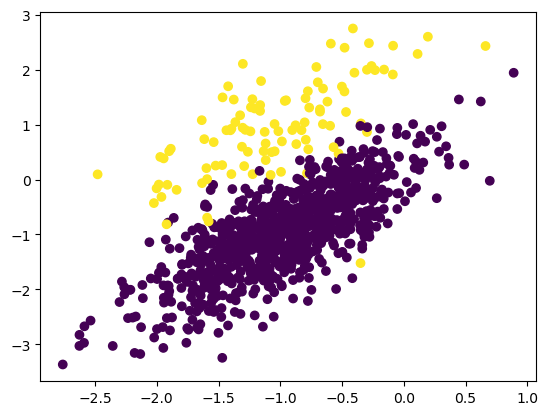

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df['f1'], df['f2'], c = df['target'])

In [22]:
# ! pip install imblearn (if not installed already)

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
## transform the dataset
oversample = SMOTE()
X,y = oversample.fit_resample(df[['f1','f2']], df['target'])

In [25]:
X.shape

(1800, 2)

In [26]:
y.shape

(1800,)

In [27]:
y.value_counts()

0    900
1    900
Name: target, dtype: int64

In [28]:
df1= pd.DataFrame(X, columns = ['f1', 'f2'])
df2= pd.DataFrame(y,columns = ['target'])
df = pd.concat([df1, df2], axis = 1)

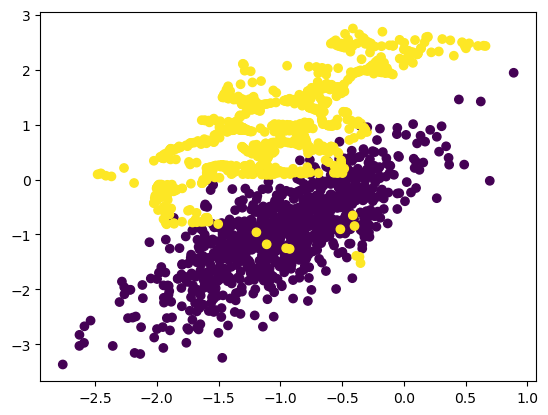

In [29]:
import matplotlib.pyplot as plt
plt.scatter(df['f1'], df['f2'], c = df['target'])

<b> Benefits of SMOTE </b> 

* Improves Model Performance: Helps algorithms better learn patterns in the minority class.

* Reduces Bias: Balances class distributions, making the model fairer.

* Prevents Overfitting: Unlike duplicating samples, SMOTE generates synthetic data, reducing redundancy.

<b> Challenges with SMOTE </b>
* Overlapping Classes: SMOTE may create synthetic samples in regions where classes overlap, leading to misclassification.
* Feature Correlation: For highly correlated features, SMOTE may distort relationships between variables.
* Scalability: SMOTE can be computationally intensive for large datasets.